<a href="https://colab.research.google.com/github/janShi1105/science/blob/main/ML14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf

In [55]:
g = tf.Graph()

In [56]:
with g.as_default():
  a = tf.constant(1, name='a')
  b = tf.constant(2, name='b')
  c = tf.constant(3, name='c')
  z = 2 * (a-b) + c

In [57]:
with tf.compat.v1.Session(graph=g) as sess:
  print('Result: z = ', sess.run(z))

Result: z =  1


In [58]:
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')
z = 2*(a-b) + c
tf.print('Result: z= ', z)

Result: z=  1


In [59]:
g = tf.Graph()
with g.as_default():
  a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
  b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
  c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
  z = 2 * (a-b) + c

  with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('Result: z = ', sess.run(z, feed_dict=feed_dict))

Result: z =  1


In [60]:
def compute_z(a,b,c):
  r1 = tf.subtract(a,b)
  r2 = tf.multiply(2, r1)
  z= tf.add(r2, c)
  return z
  

In [61]:
tf.print('Scaler Inputs: ', compute_z(1,2,3))

Scaler Inputs:  1


In [62]:
tf.print('Rank 1 Inputs: ', compute_z([1], [2], [3]))

Rank 1 Inputs:  [1]


In [63]:
tf.print('Rank 2 Inputs: ', compute_z([[1]], [[2]], [[3]]))

Rank 2 Inputs:  [[1]]


In [64]:
@tf.function
def compute_z(a,b,c):
  r1 = tf.subtract(a,b)
  r2 = tf.multiply(2, r1)
  z= tf.add(r2, c)
  return z
  

In [65]:
tf.print('Scaler Inputs: ', compute_z(1,2,3))

Scaler Inputs:  1


In [66]:
tf.print('Rank 1 Inputs: ', compute_z([1], [2], [3]))

Rank 1 Inputs:  [1]


In [67]:
tf.print('Rank 2 Inputs: ', compute_z([[1]], [[2]], [[3]]))

Rank 2 Inputs:  [[1]]


In [68]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32), tf.TensorSpec(shape=[None], dtype=tf.int32), tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a,b,c):
  r1 = tf.subtract(a,b)
  r2 = tf.multiply(2, r1)
  z= tf.add(r2, c)
  return z

In [69]:
tf.print('Rank 1 Inputs: ', compute_z([1], [2], [3]))

Rank 1 Inputs:  [1]


In [70]:
tf.print('Rank 1 Inputs: ', compute_z([1,2], [2,4], [3,6]))

Rank 1 Inputs:  [1 2]


In [71]:
a = tf.Variable(initial_value=3.14, name='var_a')
print(a)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>


In [72]:
b = tf.Variable(initial_value=[1,2,3], name='var_b')
print(b)

<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>


In [73]:
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
print(c)

<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>


In [74]:
d = tf.Variable(initial_value=['abc'], dtype=tf.string)

In [75]:
print(d)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [76]:
w = tf.Variable([1,2,3], trainable=False)
print(w.trainable)

False


In [77]:
print(w.assign([3,1,4], read_value=True))

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>


In [78]:
w.assign_add([2,-1,2], read_value=False)
print(w.value())

tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [79]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


In [80]:
v = tf.Variable(init(shape=(2,3)))
tf.print(v)

[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


In [81]:
class MyModule(tf.Module):
  def __init__(self):
    init = tf.keras.initializers.GlorotNormal()
    self.w1 = tf.Variable(init(shape=(2,3)), trainable=True)
    self.w2 = tf.Variable(init(shape=(1,2)), trainable=False)

m = MyModule()
print('All module variables: ', [v.shape for v in m.variables])

All module variables:  [TensorShape([2, 3]), TensorShape([1, 2])]


In [82]:
print('Trainable variable: ', [v.shape for v in m.trainable_variables])

Trainable variable:  [TensorShape([2, 3])]


In [83]:
tf.random.set_seed(1)

w = tf.Variable(tf.random.uniform((3,3)))
@tf.function
def compute_z(x):
  return tf.matmul(w,x)

x = tf.Variable([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.8610158]
 [2.94593048]
 [3.82629013]]


In [84]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)


In [85]:
print(w.trainable, b.trainable)

x= tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])
with tf.GradientTape() as tape:
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.reduce_sum(tf.square(y -z ))

dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw:', dloss_dw)

True True
dL/dw: -0.559999764


In [86]:
tf.print(2*x*(w*x+b-y))

[-0.559999764]


In [87]:
with tf.GradientTape() as tape:
  tape.watch(x)
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.reduce_sum(tf.square(y- z))

dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [88]:
with tf.GradientTape(persistent=True) as tape:
  z = tf.add(tf.multiply(w,x), b)
  loss = tf.reduce_sum(tf.square(y - z))

  dloss_dw = tape.gradient(loss, w)
  tf.print('dL/dw:', dloss_dw)

  dloss_db = tape.gradient(loss, b)
  tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764


dL/db: -0.399999857


In [89]:
optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w,b]))
tf.print('Updated w: ', w)
tf.print('Updated b:', b)
tf.print(dloss_dw)
tf.print(dloss_db)

Updated w:  1.0056
Updated b: 0.504
-0.559999764
-0.399999857


In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                80        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [91]:
for v in model.variables:
  print('{:20s}'.format(v.name), v.trainable, v.shape)

dense_5/kernel:0     True (4, 16)
dense_5/bias:0       True (16,)
dense_6/kernel:0     True (16, 32)
dense_6/bias:0       True (32,)


In [92]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu, kernel_initializer=tf.keras.initializers.glorot_uniform(), 
                                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.sigmoid, kernel_regularizer=tf.keras.regularizers.l1))

In [93]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

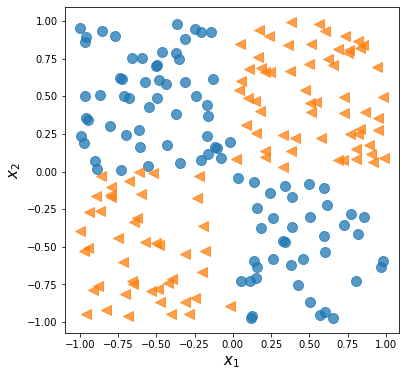

In [94]:
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200,2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]
fig = plt.figure(figsize=(6,6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [95]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

In [97]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


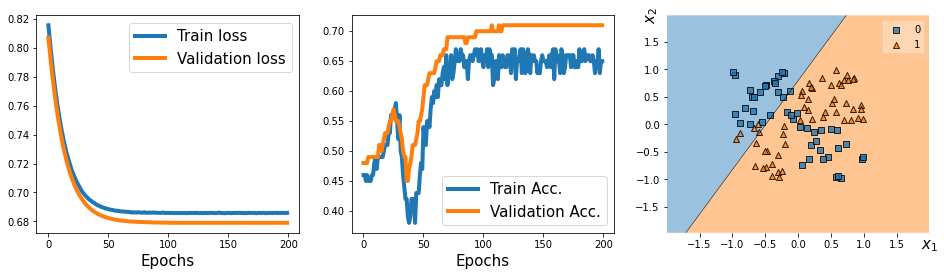

In [98]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [101]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 12        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


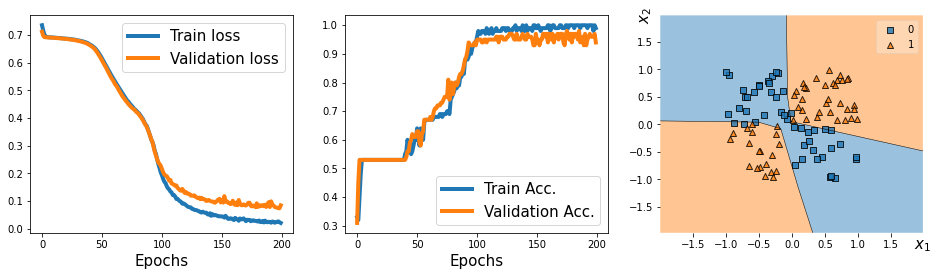

In [103]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [105]:
tf.random.set_seed(1)
inputs = tf.keras.Input(shape=(2,))
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)
outputs= tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)
model = tf.keras.Model(inputs=inputs, outputs=outputs) 
model.summary()                                             

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 12        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics = [tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train ,y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


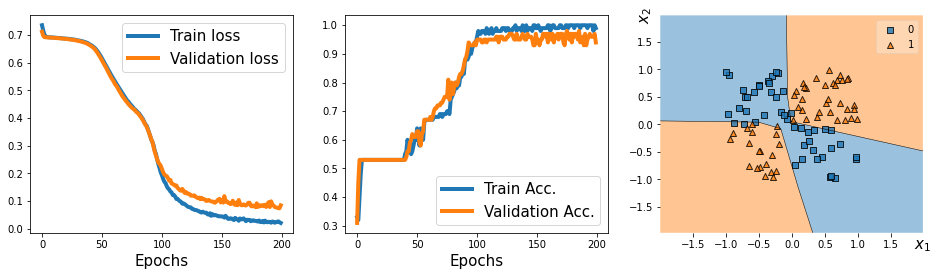

In [107]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [112]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
    self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
    self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
    self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

  def call(self, inputs):
    h = self.hidden_1(inputs)
    h = self.hidden_2(h)
    h = self.hidden_3(h)
    return self.output_layer(h)

In [113]:
tf.random.set_seed(1)
model = MyModel()
model.build(input_shape=(None,2))
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            multiple                  12        
                                                                 
 dense_31 (Dense)            multiple                  20        
                                                                 
 dense_32 (Dense)            multiple                  20        
                                                                 
 dense_33 (Dense)            multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, batch_size=2, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


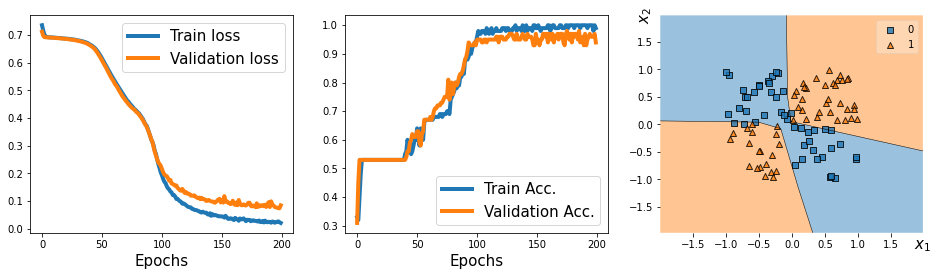

In [116]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
class NoisyLinear(tf.keras.layers.Layer):
  def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
    self.output_dim = output_dim
    self.noise_stddev = noise_stddev
    super(NoisyLinear, self).__init__(**kwargs)

  def build(self, input_shape):
    self.w_ = 